# News Article Classification
The News Article Classification problem involves categorizing news articles into predefined categories, helping to organize vast amounts of unstructured text data for easier retrieval, analysis, and user recommendations. Using the BBC News Article Dataset, which contains approximately 2,225 news articles across five categories (business, entertainment, politics, sport, and tech), the goal is to build a model that can accurately assign each article to one of these categories based on its content. This classification task is central to many applications, such as personalized news feeds, topic-based indexing, and sentiment analysis, making it an important problem in Natural Language Processing (NLP) and machine learning.

The dataset provides both the article text and the category labels, allowing for supervised learning. Each article consists of a headline and body, giving rich textual data that can be leveraged by NLP techniques to capture unique patterns and word associations associated with each category. However, news articles contain a high dimensionality of text data (many thousands of words), making feature selection essential to reduce noise and focus on the most informative terms. Popular text representation techniques, such as Bag of Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF), help convert the raw text into numerical format. Machine learning algorithms, from traditional models like Naive Bayes, Support Vector Machines (SVM) and Random Forest, can then be used to classify the articles. The challenge lies in effectively capturing the unique linguistic patterns of each category, handling the potential overlap in vocabulary across categories, and building a model that generalizes well on unseen articles.

# Import Libraries, Set Constants and Configs

In [1]:
import pandas
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
import numpy
pandas.set_option('display.max_colwidth',None)
stop_words = set(stopwords.words('english'))

# Read input data

In [2]:
input_file = 'bbc_text_cls.csv'

In [3]:
df_input_text = pandas.read_csv(input_file)

In [4]:
df_input_text.head(2)

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

In [5]:
df_input_text.columns

Index(['text', 'labels'], dtype='object')

In [6]:
df_input_text.shape

(2225, 2)

# Analyze the "Label" Column 

In [7]:
label_counts = df_input_text['labels'].value_counts()

In [8]:
label_counts

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: labels, dtype: int64

In [9]:
(df_input_text['labels'].value_counts(normalize=True) * 100).to_frame()

,labels
sport,22.966292
business,22.921348
politics,18.741573
tech,18.022472
entertainment,17.348315


Label Column Summary - Categories of news are evenly distributed in the dataset. But the Sports and Business has relatively more news compared to other categories like politics, tech and entertainment

# Analyze the "Text" Column

In [10]:
combined_text = " ".join(df_input_text['text'].astype(str).tolist())

In [11]:
combined_text = "".join([ c.lower() if c.isalnum() else " " for c in combined_text ])

In [12]:
clean_word_list = combined_text.split()

In [13]:
cleaned_tokens = [word for word in clean_word_list if word.isalpha() and word not in stop_words]

In [14]:
# Generate a word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(cleaned_tokens))

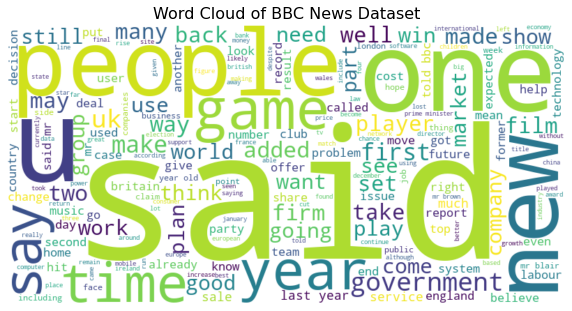

In [15]:
# Plot the word cloud
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of BBC News Dataset", fontsize=16)
plt.show()

# Text Vectorization
The TfidfVectorizer is used to transform the articles into numerical vectors based on Term Frequency-Inverse Document Frequency (TF-IDF), which helps in capturing the importance of words in the document relative to the entire corpus.

In [16]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df_input_text['text'])

In [17]:
X_tfidf.shape

(2225, 1000)

In [18]:
#Encode categories into numerical values
encoder = LabelEncoder()
df_input_text['category_encoded'] = encoder.fit_transform(df_input_text['labels'])

In [59]:
df_input_text.groupby(['labels','category_encoded']).count()

,,text,similarity
labels,category_encoded,,
business,0,510,510
entertainment,1,386,386
politics,2,417,417
sport,3,511,511
tech,4,401,401


In [21]:
# Calculate the cosine similarity between article vectors and category vectors
# Cosine similarity can give a measure of how similar the article and its category are in the vector space

# We'll first create a "category vector" for each category by averaging the TF-IDF vectors of all articles in that category
category_vectors = numpy.zeros((len(encoder.classes_), X_tfidf.shape[1]))

for idx, category in enumerate(encoder.classes_):
    category_articles = df_input_text[df_input_text['labels'] == category]
    category_vectors[idx] = numpy.mean(vectorizer.transform(category_articles['text']).toarray(), axis=0)

In [22]:
# Calculate the correlation between article vectors and category vectors using Cosine Similarity
correlations = []
for i, row in df_input_text.iterrows():
    article_vector = X_tfidf[i].toarray().flatten()
    category_idx = df_input_text.loc[i, 'category_encoded']
    category_vector = category_vectors[category_idx]
    
    # Cosine similarity between the article vector and the category vector
    similarity = cosine_similarity([article_vector], [category_vector])[0][0]
    correlations.append(similarity)

df_input_text['similarity'] = correlations

In [24]:
df_input_text['similarity']

0       0.379596
1       0.303747
2       0.268318
3       0.416260
4       0.323382
          ...   
2220    0.339068
2221    0.313240
2222    0.362553
2223    0.244708
2224    0.377757
Name: similarity, Length: 2225, dtype: float64

In [25]:
# Analyze correlation with category encoding
# Now we can calculate the Spearman rank correlation between article similarities and their encoded categories
spearman_corr, _ = spearmanr(df_input_text['similarity'], df_input_text['category_encoded'])

In [26]:
spearman_corr

0.06448176855972158

In [36]:
# Output results
print(f"Spearman Rank Correlation between news articles and their categories: {spearman_corr:.4f}")

# Optional: View articles with the highest and lowest correlation
highest_corr = df_input_text.loc[df_input_text['similarity'].idxmax()]
lowest_corr = df_input_text.loc[df_input_text['similarity'].idxmin()]

print("\nArticle with highest correlation:")
print(highest_corr)

print("\nArticle with lowest correlation:")
print(lowest_corr)

Spearman Rank Correlation between news articles and their categories: 0.0645

Article with highest correlation:
text                Blair pledges unity to Labour MPs\n\nTony Blair has sought to reassure Labour backbenchers that nothing will stand in the way of the party's bid for a third term in power.\n\nMr Blair was speaking to MPs amid fresh rumours of a rift with Gordon Brown. A new book says the prime minister went back on a pledge to Mr Brown to stand down before the next general election. The chancellor has said he is focused on winning the poll and is due to join election supremo Alan Milburn for a Labour poster launch this week. Mr Blair told the Parliamentary Labour Party (PLP) on Monday: "I know from everyone here, in Cabinet and government, nothing is going to get in the way of a unified Labour Party with a unified position and winning the third term people desperately need." The prime minister and his chancellor arrived within seconds of each other and seemingly in good sp